In [114]:
import numpy as np
import pandas as pd
from object_orient_for_JL.data_process_mat import Data_Process
from object_orient_for_JL.util import transform_date_to_age, train_model, predict_score, random_model_performance 

In [115]:
start_date = '2021-01-01'
train_date = '2021-04-01'
end_date = '2021-05-01'
data_process_obj = Data_Process(start_date, train_date, end_date)
data_process_obj.main()

100%|██████████| 19086/19086 [00:42<00:00, 446.88it/s]
/home/hsucheng/DCGS/tutorabc_dcgs_model/object_orient_for_JL/interest_tag_overlap_num.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_data_with_UF['overlap_num'] = overlap_num


In [116]:
label_AD = data_process_obj.label_AD
label_Jr = data_process_obj.label_Jr
ground_truth_AD = data_process_obj.ground_truth_AD
ground_truth_Jr = data_process_obj.ground_truth_Jr
train_data_AD_wo_label = data_process_obj.train_data_AD_wo_label
train_data_Jr_wo_label = data_process_obj.train_data_Jr_wo_label
test_data_AD_wo_label = data_process_obj.test_data_AD_wo_label
test_data_Jr_wo_label = data_process_obj.test_data_Jr_wo_label
train_data_AD = data_process_obj.train_data_AD
test_data_AD = data_process_obj.test_data_AD
train_data_Jr = data_process_obj.train_data_Jr
test_data_Jr = data_process_obj.test_data_Jr
mat_individual_col = data_process_obj.mat_individual_col
#feature_list = data_process_obj.feature_list

In [80]:
train_data_AD_wo_label.head(1)

,overlap_num,client_sn,complaint_DFV,complaint_OFA,count_consultant_points,complaint_ICV,complaint_ECR,compliment_COR,count_overall_points,T_Point,...,complaint_EAV,complaint_EAG,complaint_ICA,M_Point,complaint_ECV,count_materials_points,C_Point,compliment_PRA,compliment_INT,attend_level
6,0,10354714,0.0,0.0,1.0,0.0,0.0,0.333333,1.0,9.666667,...,0.0,0.0,0.0,9.666667,0.0,1.0,9.666667,0.666667,0.333333,11


In [81]:
train_data_AD.head(1)

,client_sn,overlap_num,complaint_OFA,complaint_DFV,count_consultant_points,complaint_ICV,complaint_ECR,compliment_COR,count_overall_points,T_Point,...,complaint_EAV,complaint_EAG,complaint_ICA,M_Point,complaint_ECV,count_materials_points,C_Point,compliment_PRA,compliment_INT,attend_level
6,10354714,0,0.0,0.0,1.0,0.0,0.0,0.333333,1.0,9.666667,...,0.0,0.0,0.0,9.666667,0.0,1.0,9.666667,0.666667,0.333333,11


In [95]:
'''
train_data_AD_wo_label = train_data_AD_wo_label.drop(['client_sn', 'MaterialID'], axis=1)
test_data_AD_wo_label = test_data_AD_wo_label.drop(['client_sn', 'MaterialID'], axis=1)
train_data_Jr_wo_label = train_data_Jr_wo_label.drop(['client_sn', 'MaterialID'], axis=1)
test_data_Jr_wo_label = test_data_Jr_wo_label.drop(['client_sn', 'MaterialID'], axis=1)
'''

In [96]:
feature_list = list(train_data_AD_wo_label.columns)
#mat_individual_col

In [97]:
# train RF model
model_AD = train_model(train_data=train_data_AD_wo_label, label=label_AD)
model_Jr = train_model(train_data=train_data_Jr_wo_label, label=label_Jr)

In [98]:
# eval of OUR (AD)
test_data_AD_array = np.array(test_data_AD_wo_label)
y_pred_AD = model_AD.predict(test_data_AD_array)
predict_score(y_pred_AD,ground_truth_AD,binary_threshold=0.5)

              precision    recall  f1-score   support

         0.0       0.64      0.63      0.64     13815
         1.0       0.80      0.81      0.80     25050

    accuracy                           0.75     38865
   macro avg       0.72      0.72      0.72     38865
weighted avg       0.74      0.75      0.74     38865

---------------------------------------
Confusion Matrix
[[ 8751  5064]
 [ 4841 20209]]
---------------------------------------
positive label : 1 | negative label : 0


In [99]:
# AD : 82,83,82,77

In [100]:
# eval of RANDOM (AD)
random_model_performance(ground_truth_AD)

              precision    recall  f1-score   support

         0.0       0.35      0.49      0.41     13815
         1.0       0.64      0.50      0.56     25050

    accuracy                           0.50     38865
   macro avg       0.50      0.50      0.48     38865
weighted avg       0.54      0.50      0.51     38865

---------------------------------------
Confusion Matrix
[[ 6802  7013]
 [12577 12473]]
---------------------------------------
positive label : 1 | negative label : 0


In [101]:
# eval of OUR (Jr)
test_data_Jr_array = np.array(test_data_Jr_wo_label)
y_pred_Jr = model_Jr.predict(test_data_Jr_array)
predict_score(y_pred_Jr,ground_truth_Jr,binary_threshold=0.5)

              precision    recall  f1-score   support

         0.0       0.42      0.32      0.36     16221
         1.0       0.70      0.79      0.74     32990

    accuracy                           0.63     49211
   macro avg       0.56      0.55      0.55     49211
weighted avg       0.61      0.63      0.62     49211

---------------------------------------
Confusion Matrix
[[ 5171 11050]
 [ 7014 25976]]
---------------------------------------
positive label : 1 | negative label : 0


In [102]:
# Jr : 0.71, 0.78, 0.74, 0.64

In [103]:
# eval of RANDOM (Jr)
random_model_performance(ground_truth_Jr)

              precision    recall  f1-score   support

         0.0       0.33      0.50      0.40     16221
         1.0       0.67      0.50      0.57     32990

    accuracy                           0.50     49211
   macro avg       0.50      0.50      0.48     49211
weighted avg       0.56      0.50      0.51     49211

---------------------------------------
Confusion Matrix
[[ 8073  8148]
 [16508 16482]]
---------------------------------------
positive label : 1 | negative label : 0


In [106]:
forest = model_Jr

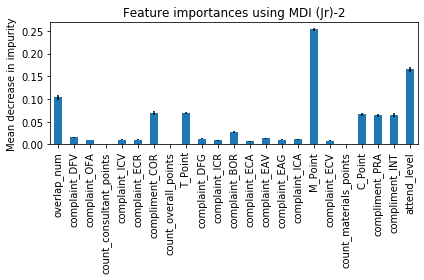

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
feature_names = feature_list
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI (Jr)-2")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [124]:
import pandas as pd
user_data = pd.read_csv('data/user_feature_BETA_Jan.csv', encoding='utf-8-sig')
mat_data = pd.read_csv('data/material_feature_BETA_Jan.csv', encoding='utf-8-sig')

In [125]:
user_data.head(1)

,client_sn,Client_Sex,birthday,Client_JobID,Client_IndustryID,education,JobName,JobClassName,IndustryName,IndustryClassName,user_interest_tag_list
0,131185,F,2011-07-13 00:00:00,31.0,12.0,大专/**/專科/大學,業務人員,General Staff,軟體資訊,Information,NaN


In [126]:
mat_data.head(1)

,MaterialID,MTitle,MShared,MaterialType,MDCGSID_ENname
0,100060,Short Fable: Nasreddin and the Pot,Adult and Non-share,Adult,People and Relationships/**/Everyday Language


In [127]:
user_data = user_data[['client_sn','user_interest_tag_list']]
mat_data = mat_data[['MaterialID','MaterialType','MDCGSID_ENname','MTitle']]
mat_data_AD = mat_data[mat_data['MaterialType']=='Adult'][['MaterialID','MDCGSID_ENname','MTitle']]

In [128]:
train_data_AD_wo_label
label_AD
test_data_AD_wo_label
ground_truth_AD

array([1., 1., 1., ..., 1., 1., 0.])

In [129]:
dat = train_data_AD_wo_label[['client_sn','MaterialID']]
dat = pd.merge(dat, user_data, how='left',on=['client_sn'])
dat = pd.merge(dat, mat_data_AD, how='left',on=['MaterialID'])

In [130]:
dat.head(10)

,client_sn,MaterialID,user_interest_tag_list,MDCGSID_ENname,MTitle
0,10354714,118145,"Management/**/Training, Education and School/*...","Health, Fitness and Medicine/**/Health & Medicine",Anti-inflammatory Foods
1,10354714,111783,"Management/**/Training, Education and School/*...","Health, Fitness and Medicine/**/Health & Medic...",What's Your Blood Type?
2,10354714,103023,"Management/**/Training, Education and School/*...",Travel and Transportation/**/Fun/Interesting s...,Three Musical Cities
3,10354714,111901,"Management/**/Training, Education and School/*...",Fun/Interesting stuff,Job Interview Mistakes
4,10354714,108949,"Management/**/Training, Education and School/*...",Fun/Interesting stuff/**/Management/**/Busines...,Setting a Price: How Much Should You Charge fo...
5,10354714,131087,"Management/**/Training, Education and School/*...","Careers and Jobs/**/Business, Industry and Fin...",International Trade: Introducing New Products
6,10354714,106537,"Management/**/Training, Education and School/*...",Everyday Language,RSB: Breaking into Breaking News
7,10354714,115164,"Management/**/Training, Education and School/*...",Shopping and Style/**/Fashion/**/Fun/Interesti...,Viral Fashions
8,10354714,108064,"Management/**/Training, Education and School/*...",Shopping and Style/**/Fashion/**/Food and Cook...,Chain Restaurants For Everyone
9,10354714,105398,"Management/**/Training, Education and School/*...",Management/**/Travel and Transportation/**/Cul...,A Great CEO Role Model - Haruka Nishimatsu


In [132]:
label_AD.shape

(94210,)

In [133]:
dat.shape

(94210, 5)

In [117]:
train_data_AD_wo_label[['client_sn','MaterialID']].head(10)

,client_sn,MaterialID
0,10354714,118145
1,10354714,111783
2,10354714,103023
3,10354714,111901
4,10354714,108949
5,10354714,131087
6,10354714,106537
7,10354714,115164
8,10354714,108064
9,10354714,105398


In [134]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

inputs = tokenizer("Hello world!", return_tensors="pt")
outputs = model(**inputs)

I0714 12:14:33.441399 140284330813248 filelock.py:274] Lock 140271216844640 acquired on /home/hsucheng/.cache/torch/transformers/4dad0251492946e18ac39290fcfe91b89d370fee250efe9521476438fe8ca185.7156163d5fdc189c3016baca0775ffce230789d7fa2a42ef516483e4ca884517.lock


I0714 12:14:34.548456 140284330813248 filelock.py:318] Lock 140271216844640 released on /home/hsucheng/.cache/torch/transformers/4dad0251492946e18ac39290fcfe91b89d370fee250efe9521476438fe8ca185.7156163d5fdc189c3016baca0775ffce230789d7fa2a42ef516483e4ca884517.lock


I0714 12:14:35.554351 140284330813248 filelock.py:274] Lock 140271297886024 acquired on /home/hsucheng/.cache/torch/transformers/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084.lock


I0714 12:14:38.211471 140284330813248 filelock.py:318] Lock 140271297886024 released on /home/hsucheng/.cache/torch/transformers/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084.lock


I0714 12:14:39.787698 140284330813248 filelock.py:274] Lock 140271299192424 acquired on /home/hsucheng/.cache/torch/transformers/f2ee78bdd635b758cc0a12352586868bef80e47401abe4c4fcc3832421e7338b.36ca03ab34a1a5d5fa7bc3d03d55c4fa650fed07220e2eeebc06ce58d0e9a157.lock


I0714 12:14:44.538238 140284330813248 filelock.py:318] Lock 140271299192424 released on /home/hsucheng/.cache/torch/transformers/f2ee78bdd635b758cc0a12352586868bef80e47401abe4c4fcc3832421e7338b.36ca03ab34a1a5d5fa7bc3d03d55c4fa650fed07220e2eeebc06ce58d0e9a157.lock


In [138]:
outputs[1].shape

torch.Size([1, 768])

In [4]:
import numpy as np
a = [[1,2,3]]
b = [[2,3,4]]
np.mean([a,b],axis=0).shape

(1, 3)

In [ ]:
!top

=top - 13:29:22 up 34 days,  4:00,  0 users,  load average: 3.05, 6.00, 12.97
Tasks: 960 total,   4 running, 579 sleeping,   0 stopped,   0 zombie
%Cpu(s):  4.8 us,  1.8 sy,  0.0 ni, 93.4 id,  0.0 wa,  0.0 hi,  0.0 si,  0.0 st
KiB Mem : 79102720+total, 56889401+free, 85848528 used, 13628462+buff/cache
KiB Swap:  8388604 total,  3466548 free,  4922056 used. 70058918+avail Mem 

  PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND     
29009 charlie+  20   0 19.422g 6.446g 562632 R  85.7  0.9   9:20.17 python3     
48341 hsucheng  20   0 56.010g 5.541g 155252 R  85.7  0.7 306:37.92 python3     
47561 hsucheng  20   0   45500   4936   3384 R   9.5  0.0   0:00.04 top         
47390 root      20   0       0      0      0 I   4.8  0.0   0:07.39 kworker/u1+ 
57759 charlie+  20   0 31.634g 0.031t  11240 R   4.8  4.1 785:11.75 jupyterhub+ 
    1 root      20   0   78628   7388   4396 S   0.0  0.0  49:05.61 systemd     
    2 root      20   0       0      0      0 S   0.0